# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key 

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


In [3]:
print(cities)

['saint croix', 'upington', 'el fasher', 'tofol', 'reggane', 'ar ruways', 'qaqortoq', 'carnarvon', 'lebu', 'tashtyp', 'ust-nera', 'yellowknife', 'sadjoavato', 'punta arenas', 'waitangi', 'port-aux-francais', 'bredasdorp', 'nova sintra', 'grytviken', 'hawaiian paradise park', 'port elizabeth', 'baotou', 'stanley', 'karasburg', 'thompson', 'yermentau', 'elmendorf air force base', 'rio grande', 'hermanus', 'ilulissat', 'blackmans bay', 'jamestown', 'laojunmiao', 'east london', 'des moines', 'margaret river', 'chonchi', 'edinburgh of the seven seas', 'invercargill', 'hadibu', 'cuprija', 'ola', 'rajpur', 'new norfolk', 'wailua homesteads', 'iqaluit', 'san mariano', 'colonia', 'tranovaho', 'georgetown', 'katsuura', 'weno', 'bilibino', 'chibougamau', 'college', 'tralee', 'as samawah', 'sisimiut', "st. john's", 'vadso', 'nemuro', 'sirte', 'bom jesus', 'papatowai', 'puerto natales', 'adamstown', 'albany', 'ushuaia', 'bethel', 'happy valley-goose bay', 'al jawf', 'cabo san lucas', 'sur', 'crane'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Testing API is working
url = "http://api.openweathermap.org/data/2.5/weather?"

city_one = 'bela vista'


# Create endpoint URL with each city
city_url = f'{url}&q={city_one}&apikey={weather_api_key}'


#Parse the JSON and retrieve data
city_weather = requests.get(f"{city_url}").json()
    

print(city_weather)


{'coord': {'lon': -56.5211, 'lat': -22.1089}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 305.8, 'feels_like': 309.3, 'temp_min': 305.8, 'temp_max': 305.8, 'pressure': 1006, 'humidity': 52, 'sea_level': 1006, 'grnd_level': 985}, 'visibility': 10000, 'wind': {'speed': 1, 'deg': 83, 'gust': 1.49}, 'clouds': {'all': 76}, 'dt': 1702323850, 'sys': {'country': 'BR', 'sunrise': 1702284942, 'sunset': 1702333379}, 'timezone': -14400, 'id': 3470177, 'name': 'Bela Vista', 'cod': 200}


In [5]:
#JSON data retrieval testing
#city_weather['dt']

1702323850

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}&q={city}&apikey={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(f"{city_url}").json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint croix
Processing Record 2 of Set 1 | upington
Processing Record 3 of Set 1 | el fasher
Processing Record 4 of Set 1 | tofol
Processing Record 5 of Set 1 | reggane
Processing Record 6 of Set 1 | ar ruways
Processing Record 7 of Set 1 | qaqortoq
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | tashtyp
Processing Record 11 of Set 1 | ust-nera
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | sadjoavato
City not found. Skipping...
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | nova sintra
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | hawaiian paradise park
Processing Record 21 of Set 1 | port elizabeth
Processing Record 2

Processing Record 39 of Set 4 | fisterra
Processing Record 40 of Set 4 | qui nhon
Processing Record 41 of Set 4 | tiksi
Processing Record 42 of Set 4 | keflavik
Processing Record 43 of Set 4 | mediesu aurit
Processing Record 44 of Set 4 | el malah
Processing Record 45 of Set 4 | petropavlovsk-kamchatsky
Processing Record 46 of Set 4 | junin de los andes
Processing Record 47 of Set 4 | bengkulu
Processing Record 48 of Set 4 | remire-montjoly
Processing Record 49 of Set 4 | bartlesville
Processing Record 0 of Set 5 | martapura
Processing Record 1 of Set 5 | swakopmund
Processing Record 2 of Set 5 | kuraymah
Processing Record 3 of Set 5 | valparaiso
Processing Record 4 of Set 5 | nar'yan-mar
Processing Record 5 of Set 5 | la passe
Processing Record 6 of Set 5 | nouadhibou
Processing Record 7 of Set 5 | port mathurin
Processing Record 8 of Set 5 | west island
Processing Record 9 of Set 5 | boende
Processing Record 10 of Set 5 | mount pearl
Processing Record 11 of Set 5 | ghadamis
Processin

Processing Record 31 of Set 8 | ulladulla
Processing Record 32 of Set 8 | northam
Processing Record 33 of Set 8 | tanjung pandan
Processing Record 34 of Set 8 | puerto leguizamo
Processing Record 35 of Set 8 | freetown
Processing Record 36 of Set 8 | petawawa
Processing Record 37 of Set 8 | bode saadu
Processing Record 38 of Set 8 | mukalla
Processing Record 39 of Set 8 | iringa
Processing Record 40 of Set 8 | tessaoua
Processing Record 41 of Set 8 | globe
City not found. Skipping...
Processing Record 42 of Set 8 | lata
Processing Record 43 of Set 8 | acopiara
Processing Record 44 of Set 8 | saldanha
Processing Record 45 of Set 8 | cruzeiro do sul
Processing Record 46 of Set 8 | flying fish cove
Processing Record 47 of Set 8 | constantia
Processing Record 48 of Set 8 | formosa do rio preto
Processing Record 49 of Set 8 | kamuli
Processing Record 0 of Set 9 | itacare
Processing Record 1 of Set 9 | pierre
Processing Record 2 of Set 9 | kudahuvadhoo
Processing Record 3 of Set 9 | brooking

Processing Record 17 of Set 12 | naguabo
Processing Record 18 of Set 12 | 'ohonua
City not found. Skipping...
Processing Record 19 of Set 12 | rikaze
Processing Record 20 of Set 12 | tvoroyri
Processing Record 21 of Set 12 | tazacorte
Processing Record 22 of Set 12 | trairi
Processing Record 23 of Set 12 | ilha de mocambique
Processing Record 24 of Set 12 | osterburken
Processing Record 25 of Set 12 | takamaka
City not found. Skipping...
Processing Record 26 of Set 12 | shimoda
Processing Record 27 of Set 12 | callao
Processing Record 28 of Set 12 | woodward
Processing Record 29 of Set 12 | midvagur
Processing Record 30 of Set 12 | bel ombre
Processing Record 31 of Set 12 | patacamaya
Processing Record 32 of Set 12 | igarka
Processing Record 33 of Set 12 | gemert
Processing Record 34 of Set 12 | nagqu
Processing Record 35 of Set 12 | porto novo
Processing Record 36 of Set 12 | randazzo
Processing Record 37 of Set 12 | barabai
Processing Record 38 of Set 12 | vernon
Processing Record 39

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint croix,17.7397,-64.7388,301.40,79,40,9.26,VI,1702323896
1,upington,-28.4478,21.2561,300.36,17,0,2.57,ZA,1702323897
2,el fasher,13.6279,25.3494,297.12,14,100,6.75,SD,1702323897
3,tofol,5.3248,163.0078,300.84,82,100,6.24,FM,1702323732
4,reggane,26.7158,0.1714,292.16,30,12,5.16,DZ,1702323897


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [4]:
# Read saved data
city_data_df2 = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df2.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint croix,17.7397,-64.7388,301.40,79,40,9.26,VI,1702323896
1,upington,-28.4478,21.2561,300.36,17,0,2.57,ZA,1702323897
2,el fasher,13.6279,25.3494,297.12,14,100,6.75,SD,1702323897
3,tofol,5.3248,163.0078,300.84,82,100,6.24,FM,1702323732
4,reggane,26.7158,0.1714,292.16,30,12,5.16,DZ,1702323897


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

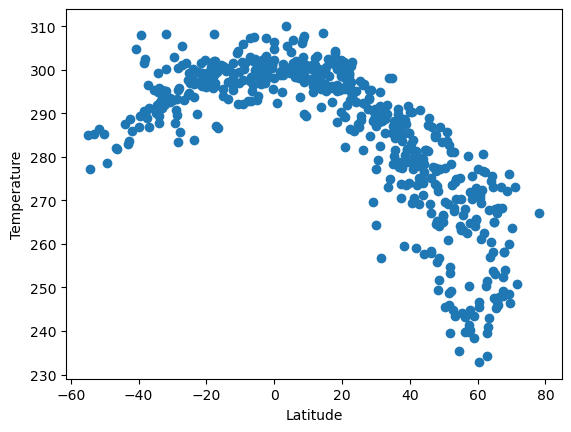

In [6]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df2['Lat']
y_values = city_data_df2['Max Temp']
plt.scatter(x_values,y_values)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

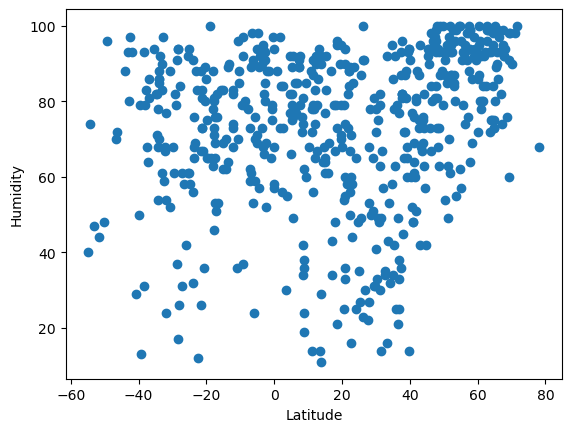

In [17]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df2['Lat']
y_values = city_data_df2['Humidity']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

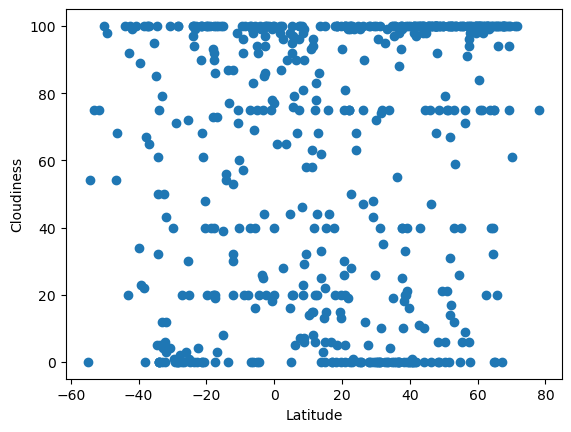

In [18]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df2['Lat']
y_values = city_data_df2['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

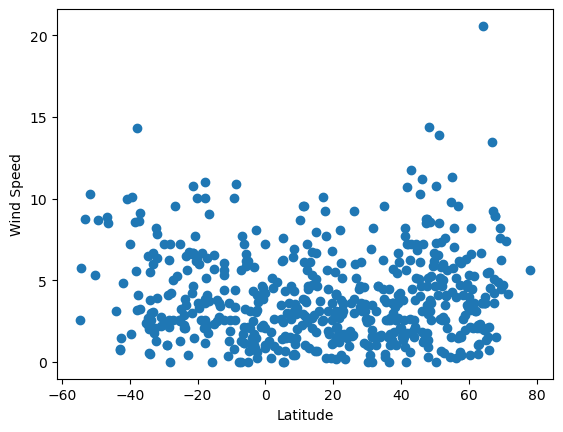

In [19]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df2['Lat']
y_values = city_data_df2['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def lin_regress(x_values, y_values, y_label, coordinate=(0,0)):
    plt.scatter(x_values,y_values)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, coordinate, fontsize=15,color="red")

# Print r value
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df2[city_data_df2['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint croix,17.7397,-64.7388,301.40,79,40,9.26,VI,1702323896
2,el fasher,13.6279,25.3494,297.12,14,100,6.75,SD,1702323897
3,tofol,5.3248,163.0078,300.84,82,100,6.24,FM,1702323732
4,reggane,26.7158,0.1714,292.16,30,12,5.16,DZ,1702323897
5,ar ruways,24.1103,52.7306,295.04,65,68,1.62,AE,1702323897


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df2[city_data_df2['Lat'] >= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint croix,17.7397,-64.7388,301.40,79,40,9.26,VI,1702323896
2,el fasher,13.6279,25.3494,297.12,14,100,6.75,SD,1702323897
3,tofol,5.3248,163.0078,300.84,82,100,6.24,FM,1702323732
4,reggane,26.7158,0.1714,292.16,30,12,5.16,DZ,1702323897
5,ar ruways,24.1103,52.7306,295.04,65,68,1.62,AE,1702323897


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7034643669706108


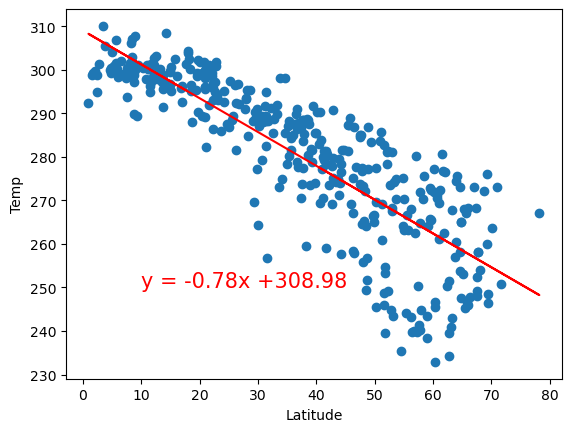

In [16]:
# Linear regression on Northern Hemisphere
lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Temp", (10, 250))

The r-value is: 0.7034643669706108


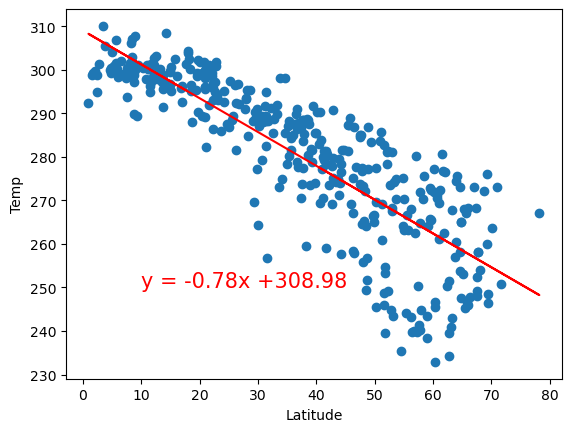

In [21]:
# Linear regression on Southern Hemisphere
lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Temp", (10, 250))

**Discussion about the linear relationship:**
This plot shows that temperature (y value) decreases in relationship to an increase in latitude (x value) in both hemispheres. This is a negative correlation. The r-value also confirms that there is a strong negative correlation between latitude and temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.13066413777600958


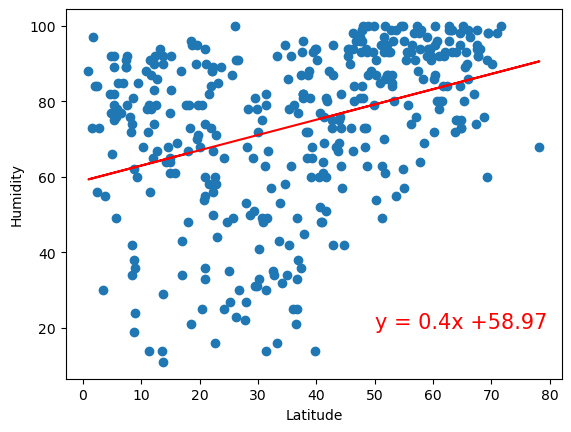

In [24]:
# Northern Hemisphere
lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity", (50, 20))

The r-value is: 0.13066413777600958


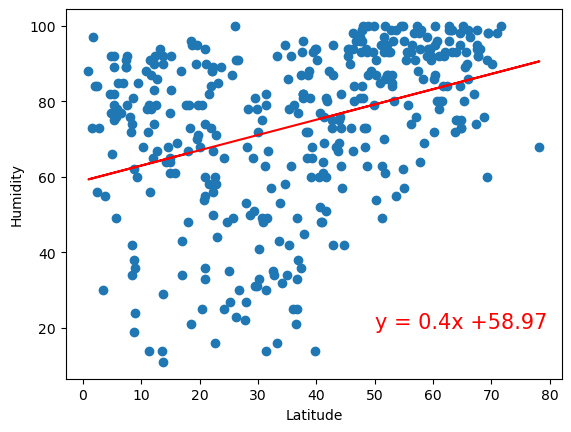

In [25]:
# Southern Hemisphere
lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity", (50, 20))

**Discussion about the linear relationship:**
This plot shows that there's little to no positive correlation between humidity (y value) and latitude (x value) in both hemispheres. The r-value also confirms that here's little to no positive correlation between latitude and temperature.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0629822410898212


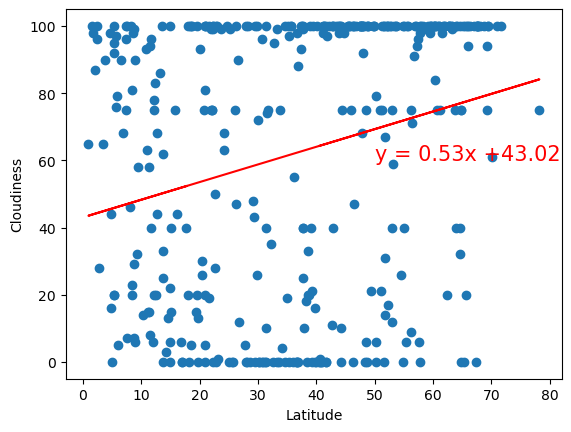

In [29]:
# Northern Hemisphere
lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness", (50, 60))

The r-value is: 0.0629822410898212


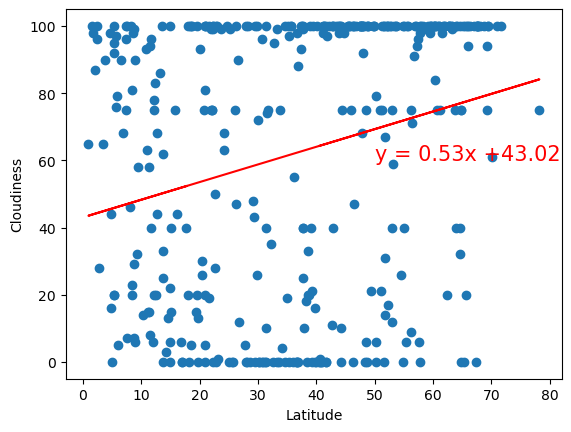

In [33]:
# Southern Hemisphere
lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness", (50, 60))

**Discussion about the linear relationship:**
This plot shows that there's little to no positive correlation between cloudiness (y value) and latitude (x value) in both hemispheres. The r-value also confirms that here's little to no positive correlation between cloudiness and temperature.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.034023893646626516


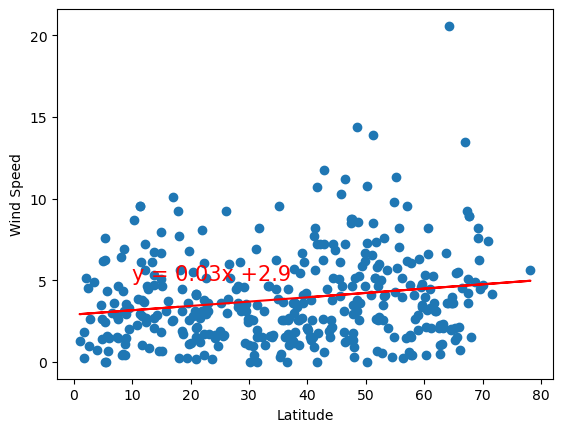

In [35]:
# Northern Hemisphere
lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed", (10, 5))

The r-value is: 0.034023893646626516


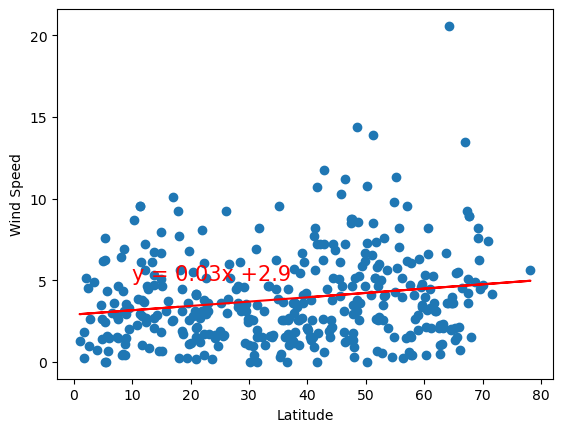

In [36]:
# Southern Hemisphere
lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed", (10, 5))

**Discussion about the linear relationship:**
This plot shows that there's little to no positive correlation between wind speed (y value) and latitude (x value) in both hemispheres. The r-value also confirms that here's little to no positive correlation between wind speed and latitude.